In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import json
import argparse
import torch
from tqdm import tqdm
import data_loader.data_loaders as module_data
import model.loss as module_loss
import model.metric as module_metric
import model.model as module_arch
from trainer import Trainer
from utils import Logger
import importlib
import math
import torchvision
print("Modules loaded")

importlib.reload(module_data) #load recent changes to data_loaders.py
importlib.reload(module_arch)
print("Reload complete")

print("GPUs available: " + str(torch.cuda.device_count()))

Modules loaded
Reload complete
GPUs available: 1


In [142]:
#This function gets the parameters from the config.json file 
def get_instance(module, name, config, *args):
    return getattr(module, config[name]['type'])(*args, **config[name]['args'])

def main(config, resume):
    train_logger = Logger() #uses entries to store training performance metrics

    # setup data_loader instances
    data_loader = get_instance(module_data, 'data_loader', config) #looks in data_loader/data_loaders.py for 'MNISTDataLoader'
    #print(os.path.isfile(data_loader.dataset))
    valid_data_loader = data_loader.split_validation() #allocate some images as validation

    # build model architecture
    model = get_instance(module_arch, 'arch', config) #looks in the model/model.py for 'MnistModel', as specified by config
    print(model)
    
    if torch.cuda.is_available():
        print("Using GPU: " + torch.cuda.get_device_name(0))
    else:
        print("Using CPU to train")
    
    #visualizeDataset(data_loader)
    visualize1(data_loader)
    
    # get function handles of loss and metrics
    loss = getattr(module_loss, config['loss']) #looks in model/loss.py for 'nll_loss'
    metrics = [getattr(module_metric, met) for met in config['metrics']] #get all the metrics in model/metrics.py - default is accuracy and top 3 accuracy

    # build optimizer, learning rate scheduler. delete every lines containing lr_scheduler for disabling scheduler
    trainable_params = filter(lambda p: p.requires_grad, model.parameters()) #Number of training params
    optimizer = get_instance(torch.optim, 'optimizer', config, trainable_params)
    lr_scheduler = get_instance(torch.optim.lr_scheduler, 'lr_scheduler', config, optimizer)

    trainer = Trainer(model, loss, metrics, optimizer,
                      resume=resume, #choose a previous epoch to start training from
                      config=config,
                      data_loader=data_loader,
                      valid_data_loader=valid_data_loader,
                      lr_scheduler=lr_scheduler,
                      train_logger=train_logger)

    trainer.train()

def visualizeDataset(dataloader):
    images, labels = next(iter(dataloader))
    plt.imshow(torchvision.utils.make_grid(images, nrow=8).permute(1, 2, 0))
    
def visualize1(dataloader):
    images, labels = next(iter(dataloader))
    #print(images.shape)
    #print(labels)
    fig = plt.figure(figsize=(40, 40))
    batch = math.ceil(math.sqrt(dataloader.batch_size))
    for i in range(len(images)):
        a = fig.add_subplot(batch,batch,i+1)
        img = images[i].permute(1,2,0).numpy()
        img = np.squeeze(img)
        imgplot = plt.imshow(img, cmap = "gray")
        plt.axis('off')
        a.set_title("Label = " +str(labels[i].numpy()), fontsize=30)

In [143]:
config_file = 'config_groundTruth.json' 

##
# .json file contains a data_loader_test, which should point to a separate test images folder, NOT the same training folder
##

# load config file
with open(config_file) as handle:
    config = json.load(handle)
# setting path to save trained models and log files
path = os.path.join(config['trainer']['save_dir'], config['name'])

groundTruthModel(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=2, bias=True)
)
Trainable parameters: 21432
Using GPU: Tesla K80


Train Epoch: 1 [0/547 (0%)] Loss: 17.789577
Train Epoch: 1 [512/547 (89%)] Loss: 5.430112
    val_my_metric  : 0.5166666666666667
    epoch          : 1
    my_metric      : 0.46572420634920636
    val_loss       : 3.272545576095581
    loss           : 15.670180161794027
Saving checkpoint: saved/GroundTruthMNIST/0522_200940/checkpoint-epoch1.pth ...
Saving current best: model_best.pth ...
Train Epoch: 2 [0/547 (0%)] Loss: 7.124116
Train Epoch: 2 [512/547 (89%)] Loss: 2.113817
    val_my_metric  : 0.5333333333333333
    epoch          : 2
    my_metric      : 0.5145833333333333
    val_loss       : 0.9136594533920288
    loss           : 4.6713897652096215
Saving checkpoint: saved/GroundTruthMNIST/0522_200940/checkpoint-epoch2.pth ...
Saving current best: model_best.pth ...
Train Epoch: 3 [0/547 (0%)] Loss: 2.339443
Train Epoch: 3 [512/547 (89%)] Loss: 1.893233
    val_my_metric  : 0.43333333333333335
    epoch          : 3
    my_metric      : 0.4833829365079365
    val_loss       : 0

Train Epoch: 23 [512/547 (89%)] Loss: 0.759190
    val_my_metric  : 0.7333333333333333
    epoch          : 23
    my_metric      : 0.6135912698412699
    val_loss       : 0.6658522486686707
    loss           : 0.7044905092981126
Saving checkpoint: saved/GroundTruthMNIST/0522_200940/checkpoint-epoch23.pth ...
Saving current best: model_best.pth ...
Train Epoch: 24 [0/547 (0%)] Loss: 0.717670
Train Epoch: 24 [512/547 (89%)] Loss: 0.700673
    val_my_metric  : 0.7
    epoch          : 24
    my_metric      : 0.5545634920634921
    val_loss       : 0.6696863770484924
    loss           : 0.7064480384190878
Saving checkpoint: saved/GroundTruthMNIST/0522_200940/checkpoint-epoch24.pth ...
Train Epoch: 25 [0/547 (0%)] Loss: 0.628856
Train Epoch: 25 [512/547 (89%)] Loss: 0.711721
    val_my_metric  : 0.7333333333333333
    epoch          : 25
    my_metric      : 0.5984623015873016
    val_loss       : 0.6600388884544373
    loss           : 0.7293567856152853
Saving checkpoint: saved/GroundT

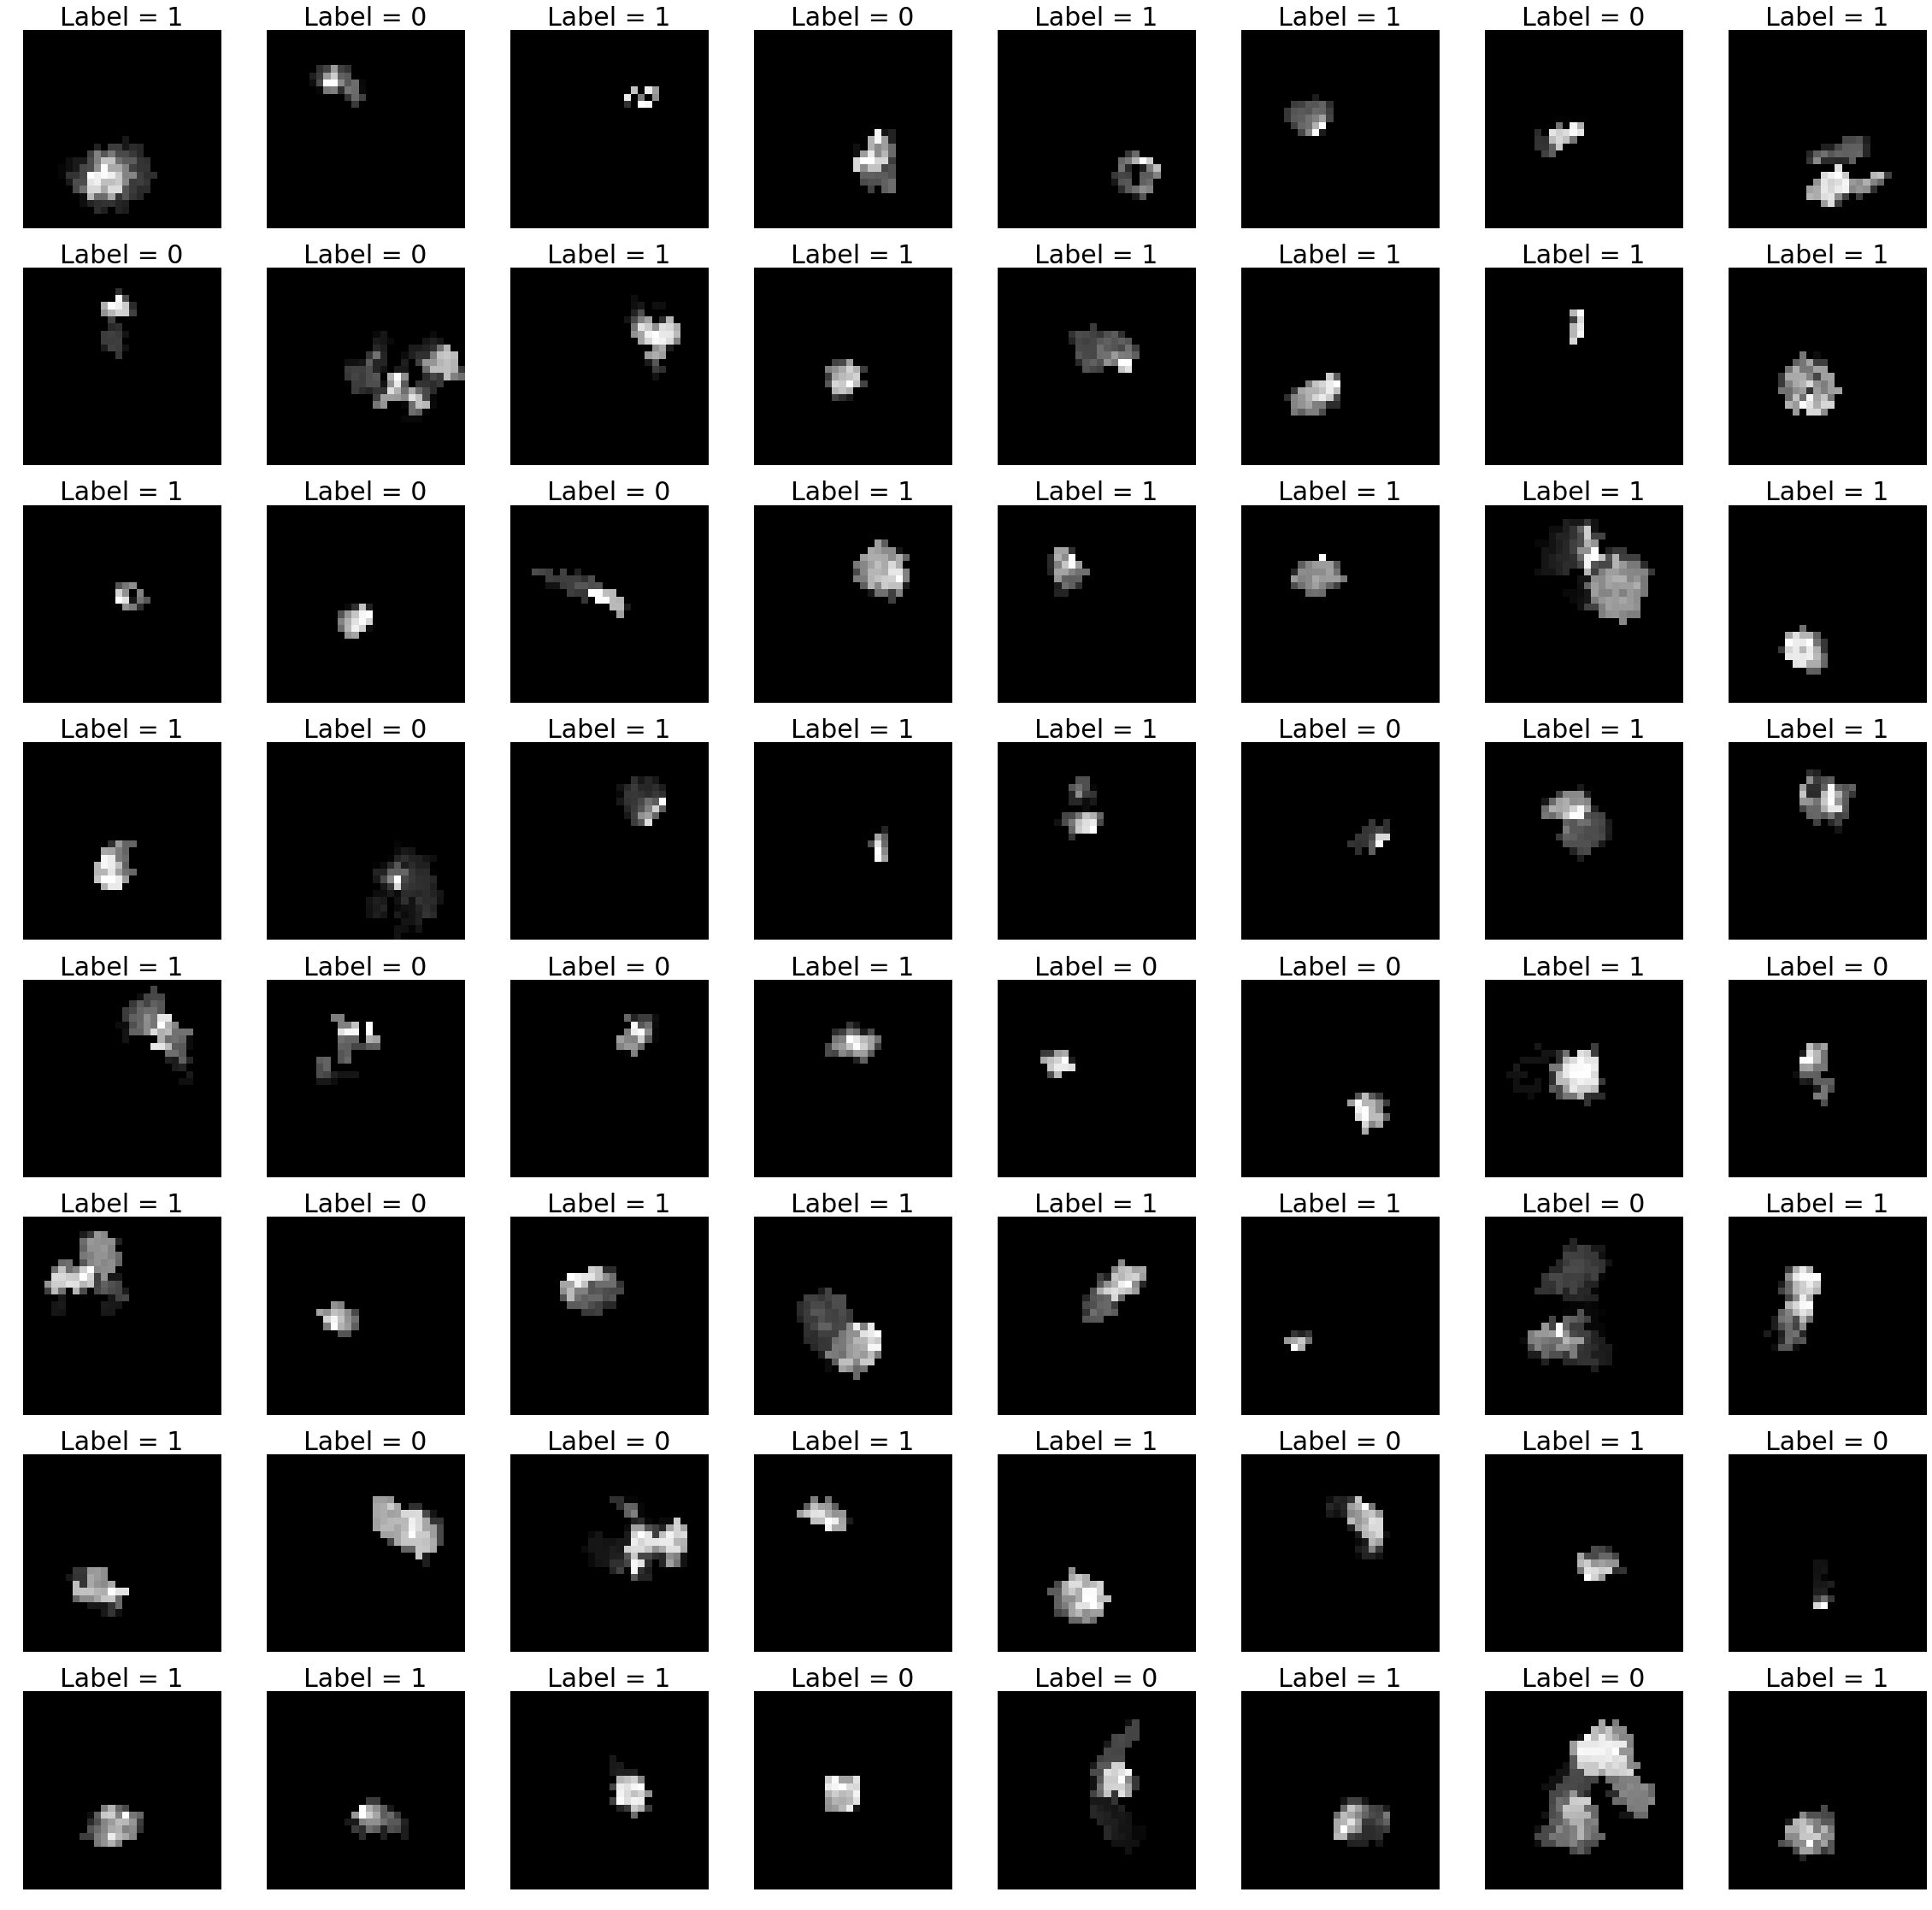

In [144]:
#Train the network
main(config, None)

In [134]:
def visualizationOutGray(data, output, target, classes):
    ig = plt.figure()
    output_cpu = output.to(torch.device("cpu"))
    target_cpu = target.to(torch.device("cpu"))
    output_idx = (np.argmax(output_cpu[0], axis=0)) #reverse one hot
    cls = classes[output_idx]
    plt.title("Prediction = " + str(cls) + " | Actual = " + str(classes[target_cpu[0].numpy()]) )
    data_cpu = data.to(torch.device("cpu"))
    img = data_cpu[0]
    plt.imshow(np.transpose(np.reshape(img, (1,28,28)), (1,2,0)).squeeze(), cmap = 'gray') # realign    
    

def main2(config, resume):
    # setup data_loader instances
    data_loader = get_instance(module_data, 'data_loader_test', config)
    '''
    
    data_loader = getattr(module_data, config['data_loader']['type'])(
        config['data_loader']['args']['data_dir'],
        batch_size=1,
        shuffle=False,
        validation_split=0.0,
        training=False,
        num_workers=2
    )
    '''
    # build model architecture
    model = get_instance(module_arch, 'arch', config)
    print(model)
    print(torch.cuda.get_device_name(0))


    
    # get function handles of loss and metrics
    loss_fn = getattr(module_loss, config['loss'])
    metric_fns = [getattr(module_metric, met) for met in config['metrics']]
    
    # load state dict
    checkpoint = torch.load(resume)
    state_dict = checkpoint['state_dict'] #dictionary of model parameters from saved file
    if config['n_gpu'] > 1:
        model = torch.nn.DataParallel(model)
    model.load_state_dict(state_dict) 
    
    # prepare model for testing
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    model.eval() #tells model to ignore dropout and batch normalization
    
    total_loss = 0.0
    total_metrics = torch.zeros(len(metric_fns))
    
    classes = ('class1', 'class2')
    
    with torch.no_grad(): #speed up calculations, unable to perform back propogation
        for i, (data, target) in enumerate(tqdm(data_loader)): #tqdm is a progress bar
            data, target = data.to(device), target.to(device)
            output = model(data)
            #
            # save sample images, or do something with output here
            #
            
            
            if i < 5:
                visualizationOutGray(data, output, target, classes)
                
                
            # computing loss, metrics on test set
            loss = loss_fn(output, target)
            batch_size = data.shape[0]
            total_loss += loss.item() * batch_size
            for i, metric in enumerate(metric_fns):
                total_metrics[i] += metric(output, target) * batch_size
        
        plt.show()
                      
    n_samples = len(data_loader.sampler)
    print("num samples = " + str(n_samples))
    log = {'loss': total_loss / n_samples}
    log.update({met.__name__: total_metrics[i].item() / n_samples for i, met in enumerate(metric_fns)})
    print(log)
    print("My_metric is accuracy")
    
   

In [135]:
resume = "saved/GroundTruthMNIST/0522_183818/model_best.pth"

print(os.path.isdir("saved/GroundTruthMNIST/0522_183818"))
print(os.path.exists(resume))

#config = torch.load("saved/Mnist_LeNet/0414_203632/config.json")
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

True
True


  0%|          | 0/607 [00:00<?, ?it/s]

groundTruthModel(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=2, bias=True)
)
Trainable parameters: 21432
Tesla K80


100%|██████████| 607/607 [00:02<00:00, 250.60it/s]


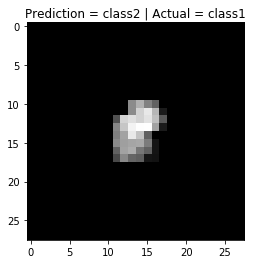

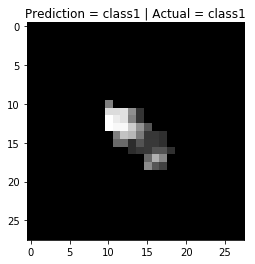

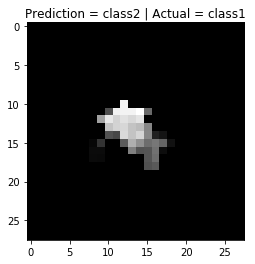

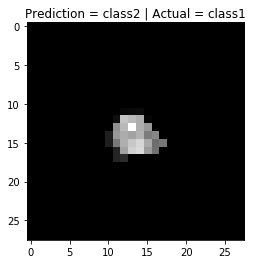

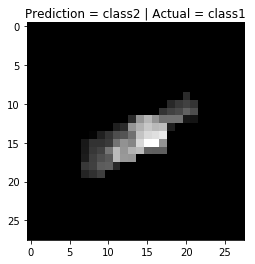

num samples = 607
{'my_metric': 0.7084019769357496, 'loss': 0.6006297792693143}
My_metric is accuracy


In [136]:
#Test
main2(config, resume)